# ***Main Function: Validation Site***

***Sites selection***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats, integrate
import scipy.stats as st
import time
import random
import sklearn.metrics
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
%matplotlib inline

***Fixed paras***

In [2]:
decom_para_mean = pd.read_csv("./postPara_lss/validPara_1001/postParaAll_mean.csv",index_col=0)     # Fixed parameters
decom_para_mean.head()

,CN_AOM1,CN_AOM2,CN_AOM3,CN_SMB1,CN_SMB2,CN_SMR,CN_NOM,CN_MOM,kmax_AOM1,kmax_AOM2,...,fE_AOM1,fE_AOM2,fE_AOM3,fE_NOM,fA_SMB1,fM_SMB1,fA_SMB2,fM_SMB2,lig_p1,lig_p2
BONA1,25.171935,149.591605,338.399588,6.994306,12.699913,10.023063,6.465967,8.103050,0.465183,1.634575,...,0.414930,0.180263,0.059657,0.324583,0.542457,0.589967,0.249967,0.453921,11.005186,0.981271
BONA2,25.223889,150.300265,251.435167,6.273080,10.185015,11.669082,7.796311,18.086929,0.486025,1.207296,...,0.783823,0.583231,0.118910,0.131784,0.491944,0.761101,0.264764,0.755273,7.666475,0.985359
BONA3,25.039959,149.763792,323.765863,17.477183,18.305371,9.031773,9.709108,14.444202,0.459270,1.064458,...,0.599485,0.154019,0.085211,0.224525,0.462018,0.592418,0.534564,0.337424,3.891076,0.948740
BONA4,25.020269,149.727137,171.899406,17.474921,13.820462,11.896581,19.908956,9.223964,0.701238,0.854588,...,0.833296,0.439534,0.042948,0.136527,0.727648,0.789260,0.231726,0.794623,4.290492,0.970392
CPER1,25.052308,150.332975,164.262849,8.841325,15.030400,14.141293,7.027549,5.090525,0.427953,3.939154,...,0.398842,0.165830,0.033917,0.373061,0.246909,0.849741,0.120668,0.827861,7.844090,0.989351


***Learned paras***

In [3]:
decom_para_valid = pd.read_csv("./postPara_lss/validPara_1001/validParaSA_hat.csv",index_col=0)
valid_site_index = decom_para_valid.index
print(valid_site_index)
decom_para_valid.sort_index()

Index(['CPER1', 'HARV2', 'KONZ1', 'KONZ3', 'KONZ4', 'ONAQ1', 'ONAQ3', 'SJER4',
       'SRER1', 'TALL2', 'TOOL1', 'WOOD1', 'WOOD3', 'WOOD4', 'WREF1', 'YELL1',
       'YELL2', 'YELL3'],
      dtype='object')


,kmax_AOM1,kmax_AOM2,kmax_AOM3,kmax_NOM,fE_AOM1,fE_NOM,lig_p1,lig_p2
CPER1,0.506585,2.172983,10.505287,0.297806,0.542983,0.561804,7.007666,0.958547
HARV2,0.536081,3.131584,11.629080,0.401322,0.672267,0.542199,7.253781,0.978963
KONZ1,0.446865,1.186865,13.772093,0.314883,0.478046,0.414685,8.002999,0.961879
KONZ3,0.466543,1.509247,13.870487,0.328071,0.508328,0.399451,7.678751,0.964328
KONZ4,0.441250,1.329339,13.554213,0.276604,0.448989,0.453331,8.133094,0.958781
ONAQ1,0.529110,3.818746,15.503018,0.343535,0.586979,0.606237,9.214006,0.948053
ONAQ3,0.545591,3.384905,14.562777,0.410418,0.694886,0.525224,8.106071,0.954818
SJER4,0.511489,2.441702,11.761464,0.401965,0.635353,0.380685,5.507186,0.970502
SRER1,0.575875,2.957082,11.632515,0.419411,0.731028,0.609039,6.878867,0.947366
TALL2,0.503345,3.076879,12.565891,0.440039,0.640628,0.467676,7.361636,0.983448


***Main Function***

In [4]:
##Sample site & Lab incubation days## 

day  = 571+1
para_sample = 1                      # We only have one para for validation sites #

#Package import#
import numpy as np
import pandas as pd
import time
from Decomposition import CWD_pool
from Decomposition import SOM_pool
from Decomposition import av_Nitro
from Decomposition import CWDFrag_OrgInAllocLab
from Decomposition import SoilDecom_pot
from Decomposition import SoilDecom_real
from Decomposition import initial_content
from Decomposition import lls_CO2


#Looping for Each Site#

for sample_site in valid_site_index:
    print(sample_site)
    Rh_total  = np.zeros((para_sample,day-1))
    Rh_litter = np.zeros((para_sample,day-1))
    Rh_lignin = np.zeros((para_sample,day-1))
    Rh_soil   = np.zeros((para_sample,day-1))
    for i in range(0,para_sample):
        #Input data#
        obser_data = pd.read_csv("./labObser_lss/obser_data.csv",index_col=0)
        #Fixed Paras#
        deltaFactor = 0.0
        decom_para_fixed = pd.read_csv("./postPara_lss/validPara_1001/priorParaAll_mean.csv",index_col=0)     # Fixed parameters
        decom_para       = decom_para_fixed.loc[sample_site,:]
        CN_AOM1      = decom_para[0] + deltaFactor
        CN_AOM2      = decom_para[1] + deltaFactor
        CN_AOM3      = decom_para[2] + deltaFactor
        CN_SMB1      = decom_para[3] + deltaFactor
        CN_SMB2      = decom_para[4] + deltaFactor
        CN_SMR       = decom_para[5] + deltaFactor
        CN_NOM       = decom_para[6] + deltaFactor
        CN_MOM       = decom_para[7] + deltaFactor
        kmax_AOM1    = decom_para[8]
        kmax_AOM2    = decom_para[9]
        kmax_AOM3    = decom_para[10]
        kmax_SMR     = decom_para[11] + deltaFactor
        kmax_NOM     = decom_para[12]
        kmax_MOM     = decom_para[13] + deltaFactor
        fAOM1_SMB1   = decom_para[14] + deltaFactor
        fAOM2_SMB1   = decom_para[15] + deltaFactor
        fAOM_MOM     = decom_para[16] + deltaFactor
        fAOM3_SMB1   = decom_para[17] + deltaFactor
        fNOM_SMB1    = decom_para[18] + deltaFactor
        fNOM_MOM     = decom_para[19] + deltaFactor
        fE_AOM1      = decom_para[20]+ deltaFactor
        fE_AOM2      = decom_para[21]+ deltaFactor
        fE_AOM3      = decom_para[22]+ deltaFactor
        fE_NOM       = decom_para[23]
        fA_SMB1      = decom_para[24]+ deltaFactor
        fM_SMB1      = decom_para[25]+ deltaFactor
        fA_SMB2      = decom_para[26]+ deltaFactor
        fM_SMB2      = decom_para[27]+ deltaFactor
        lig_p1       = decom_para[28]         #2log#
        lig_p2       = decom_para[29]         #2log#
        #Learned para from FCNN#
        decom_para_learned = pd.read_csv("./postPara_lss/validPara_1001/validParaSA_hat.csv",index_col=0)
        decom_para_post    = decom_para_learned.loc[sample_site,:]
        #Optimized parameters#
# #         CN_AOM1      = decom_para_post[0]
# #         CN_AOM2      = decom_para_post[1]
# #         CN_AOM3      = decom_para_post[2]
# #         CN_SMB1      = decom_para_post[3]
# #         CN_SMB2      = decom_para_post[4]
# #         CN_SMR       = decom_para_post[5]
# #         CN_NOM       = decom_para_post[6]
# #         CN_MOM       = decom_para_post[7]
#         kmax_AOM1    = decom_para_post[0]
#         kmax_AOM2    = decom_para_post[1]
#         kmax_AOM3    = decom_para_post[2]
# #         kmax_SMR     = decom_para_post[11]
#         kmax_NOM     = decom_para_post[3]
# #         kmax_MOM     = decom_para_post[3]
# #         fAOM1_SMB1   = decom_para_post[14]
# #         fAOM2_SMB1   = decom_para_post[15]
# #         fAOM_MOM     = decom_para_post[16]
# #         fAOM3_SMB1   = decom_para_post[17]
# #         fNOM_SMB1    = decom_para_post[18]
# #         fNOM_MOM     = decom_para_post[19]
#         fE_AOM1      = decom_para_post[4]
# #         fE_AOM2      = decom_para_post[21]
# #         fE_AOM3      = decom_para_post[22]
#         fE_NOM       = decom_para_post[5]
# #         fA_SMB1      = decom_para_post[24]
# #         fM_SMB1      = decom_para_post[25]
# #         fA_SMB2      = decom_para_post[26]
# #         fM_SMB2      = decom_para_post[27]
#         lig_p1       = decom_para_post[6]
#         lig_p2       = decom_para_post[7]
        #Class initialization#
        litter = CWD_pool(obser_data,sample_site,"litter")
        AOM1   = SOM_pool(obser_data,sample_site,'AOM1')
        AOM2   = SOM_pool(obser_data,sample_site,'AOM2')
        AOM3   = SOM_pool(obser_data,sample_site,'AOM3')
        SMB1   = SOM_pool(obser_data,sample_site,'SMB1')
        SMB2   = SOM_pool(obser_data,sample_site,'SMB2')
        SMR    = SOM_pool(obser_data,sample_site,'SMR')
        NOM    = SOM_pool(obser_data,sample_site,'NOM')
        MOM    = SOM_pool(obser_data,sample_site,'MOM')
        avN    = av_Nitro(obser_data,sample_site)
        initCont   = initial_content()
        initCont.MicroSMB1Zero(SMB1.C)
        initCont.MicroSMB2Zero(SMB2.C)
        #initCont.LitterSub(litter.C*kbase_litter)
        #initCont.SoilSub(NOM.C*kmax_NOM)
        #Data Collection#
        Rh=[]
        flag_SMB1 = 0
        flag_SMB2 = 0
        
        CWDFrag_OrgInAllocLab(sample_site,obser_data,litter,AOM1,AOM2,AOM3,CN_AOM1,CN_AOM2,CN_AOM3)

        #Looping for Each Inbubation Day#
        for t in range(1,day):
            potimm = 0
            Nmin = 0
            litligsoil_CO2 = lls_CO2()

            bimm_AOM1,bimm_AOM2,bimm_AOM3,bimm_SMR,bimm_NOM,bimm_MOM,potimm = SoilDecom_pot(sample_site,t,obser_data,potimm,flag_SMB1,flag_SMB2,lig_p1,lig_p2,          #2log#  
                                                                                            AOM1,AOM2,AOM3,SMB1,SMB2,SMR,NOM,MOM,initCont, 
                                                                                            CN_SMB1,CN_SMB2,CN_SMR,CN_NOM,CN_MOM, 
                                                                                            kmax_AOM1,kmax_AOM2,kmax_AOM3,kmax_SMR,kmax_NOM,kmax_MOM, 
                                                                                            fAOM1_SMB1,fAOM2_SMB1,fAOM_MOM,fAOM3_SMB1,fNOM_SMB1,fNOM_MOM, 
                                                                                            fE_AOM1,fE_AOM2,fE_AOM3,fE_NOM,fA_SMB1,fA_SMB2,fM_SMB1,fM_SMB2)

            Rh,flag_SMB1,flag_SMB2,fM_SMB1,fM_SMB2 = SoilDecom_real (sample_site,t,obser_data,Nmin,potimm,flag_SMB1,flag_SMB2,Rh,lig_p1,lig_p2,
                                                                        AOM1,AOM2,AOM3,SMB1,SMB2,SMR,NOM,MOM,avN,initCont,litligsoil_CO2,  
                                                                        bimm_AOM1,bimm_AOM2,bimm_AOM3,bimm_SMR,bimm_NOM,bimm_MOM,  
                                                                        CN_SMB1,CN_SMB2,CN_SMR,CN_NOM,CN_MOM,kmax_AOM1,kmax_AOM2,kmax_AOM3,kmax_SMR,kmax_NOM,kmax_MOM,  
                                                                        fAOM1_SMB1,fAOM2_SMB1,fAOM_MOM,fAOM3_SMB1,fNOM_SMB1,fNOM_MOM,  
                                                                        fE_AOM1,fE_AOM2,fE_AOM3,fE_NOM,fA_SMB1,fA_SMB2,fM_SMB1,fM_SMB2)


        ##Data Output##
        Rh_array = np.array(Rh)
        Rh_day = Rh_array.reshape(-1,14)
        Rh_total[i,:]  = Rh_day[:,-4]
        Rh_litter[i,:] = Rh_day[:,-3]
        Rh_lignin[i,:] = Rh_day[:,-2]
        Rh_soil[i,:]   = Rh_day[:,-1]
        
    np.savetxt('./modelResult_lss/validationResult_1001/{Site_Num}_lss_total.csv'.format(Site_Num=sample_site),Rh_total,delimiter=",")
    np.savetxt('./modelResult_lss/validationResult_1001/{Site_Num}_lss_litter.csv'.format(Site_Num=sample_site),Rh_litter,delimiter=",")
    np.savetxt('./modelResult_lss/validationResult_1001/{Site_Num}_lss_lignin.csv'.format(Site_Num=sample_site),Rh_lignin,delimiter=",")
    np.savetxt('./modelResult_lss/validationResult_1001/{Site_Num}_lss_soil.csv'.format(Site_Num=sample_site),Rh_soil,delimiter=",")
    
    
    

CPER1
HARV2
KONZ1
KONZ3
KONZ4
ONAQ1
ONAQ3
SJER4
SRER1
TALL2
TOOL1
WOOD1
WOOD3
WOOD4
WREF1
YELL1
YELL2
YELL3


***

CPER1


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

HARV2


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

KONZ1


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

KONZ3


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

KONZ4


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

ONAQ1


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

ONAQ3


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

SJER4


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

SRER1


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

TALL2


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

TOOL1


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

WOOD1


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

WOOD3


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

WOOD4


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

WREF1


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

YELL1


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

YELL2


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

YELL3


<ipython-input-5-8e0d025f68b1>:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:272: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:285: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
<ipython-input-5-8e0d025f68b1>:297: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit l

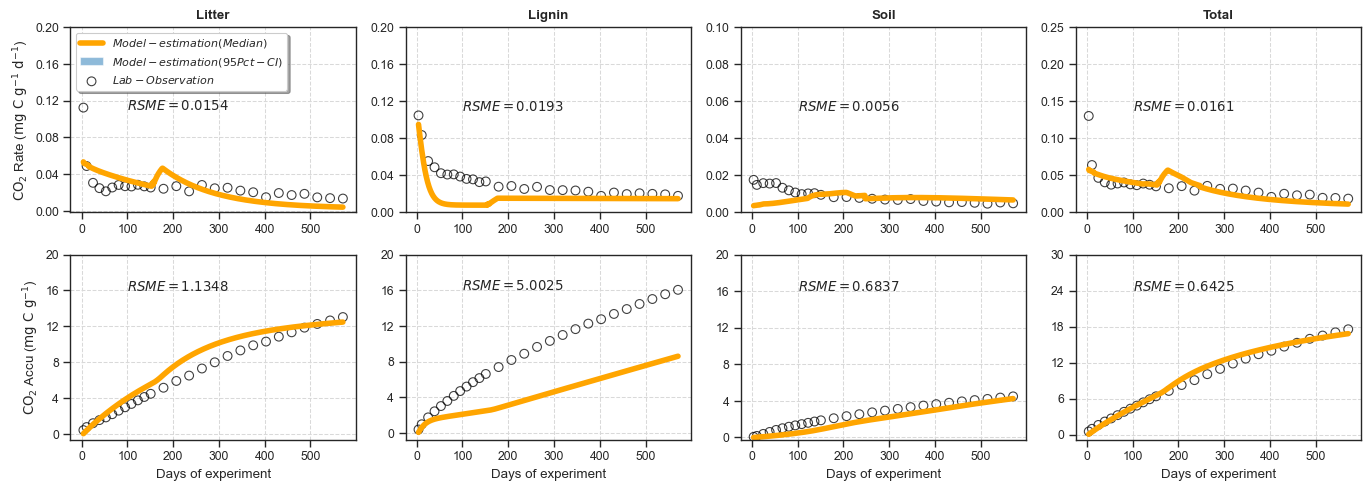

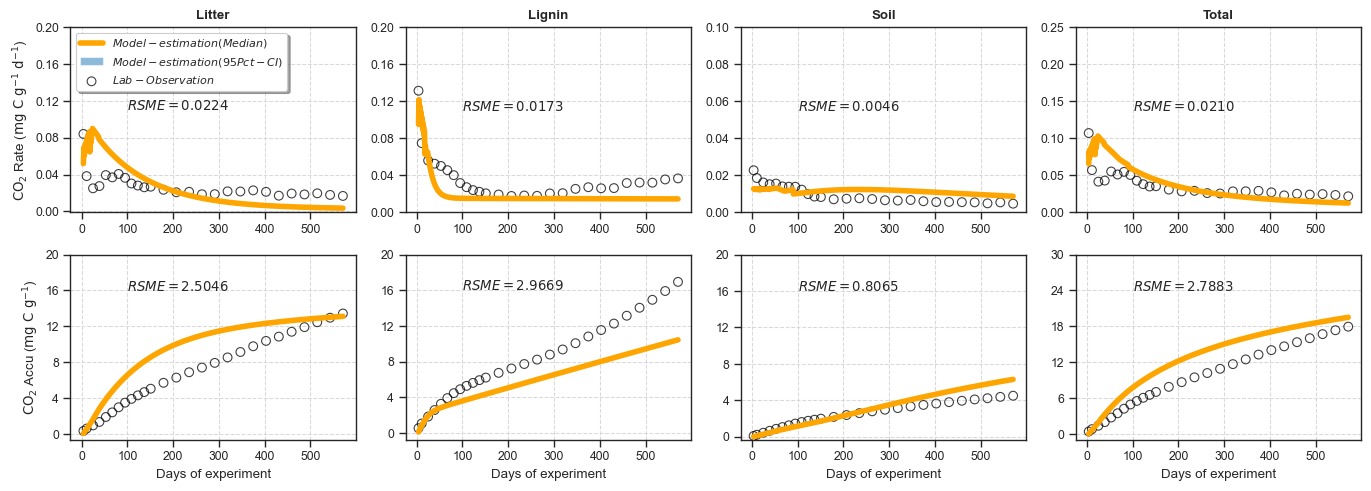

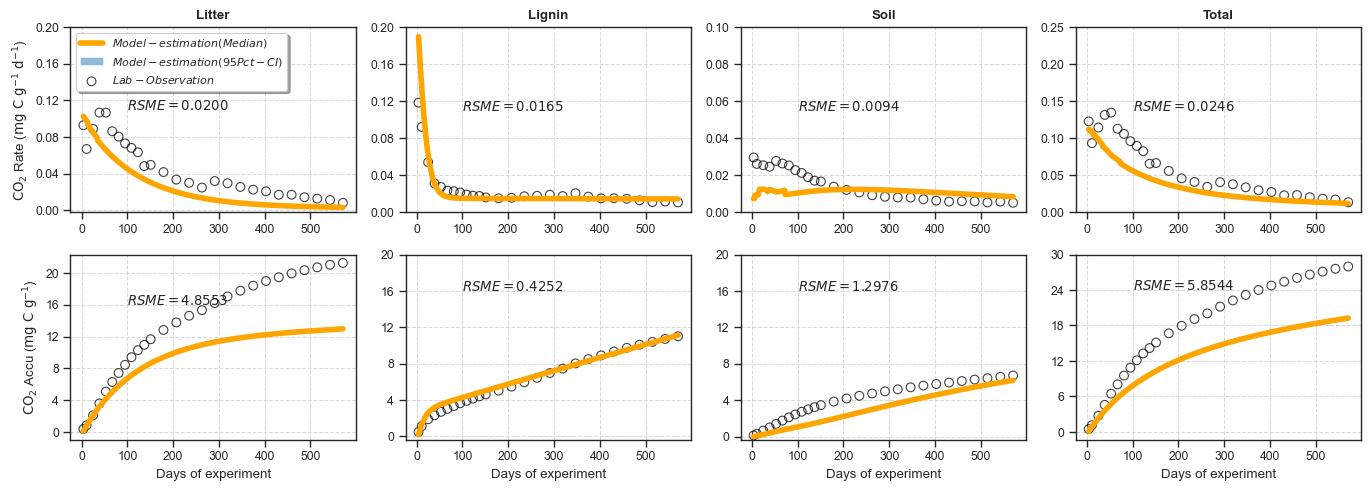

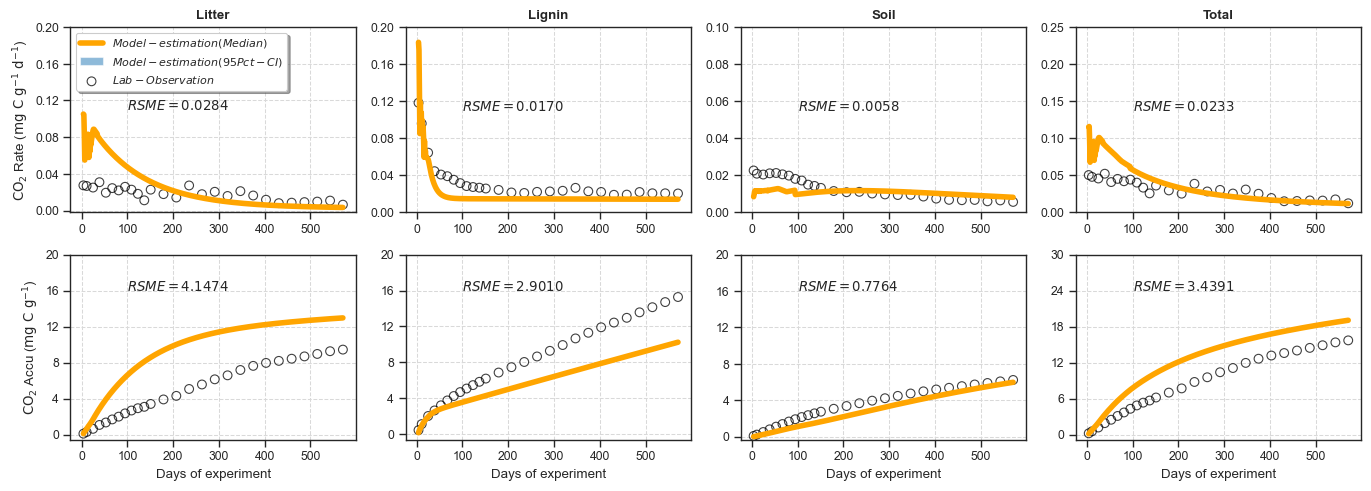

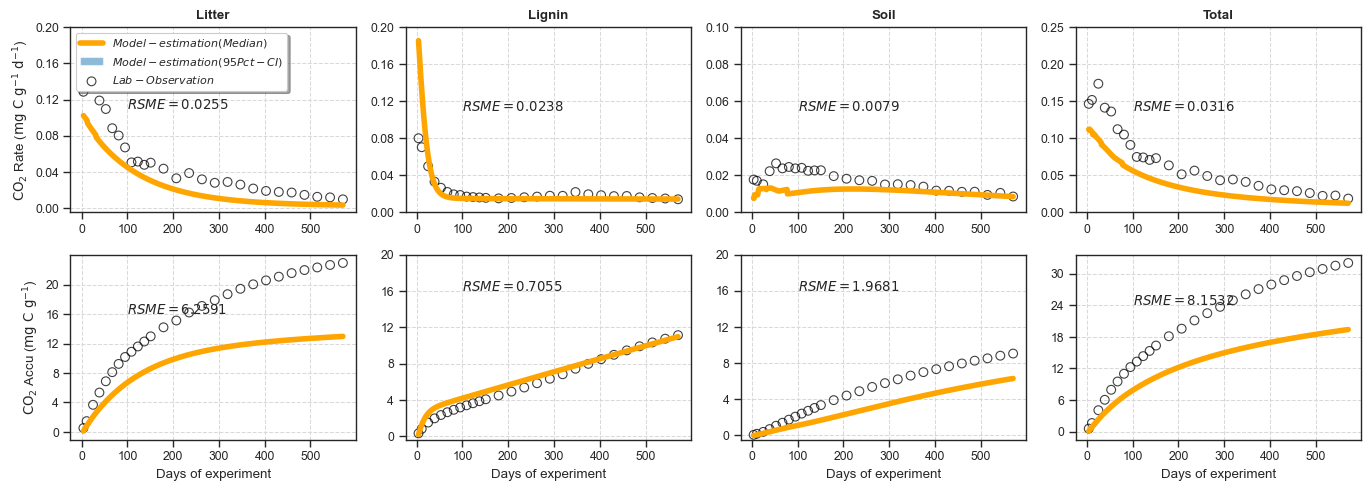

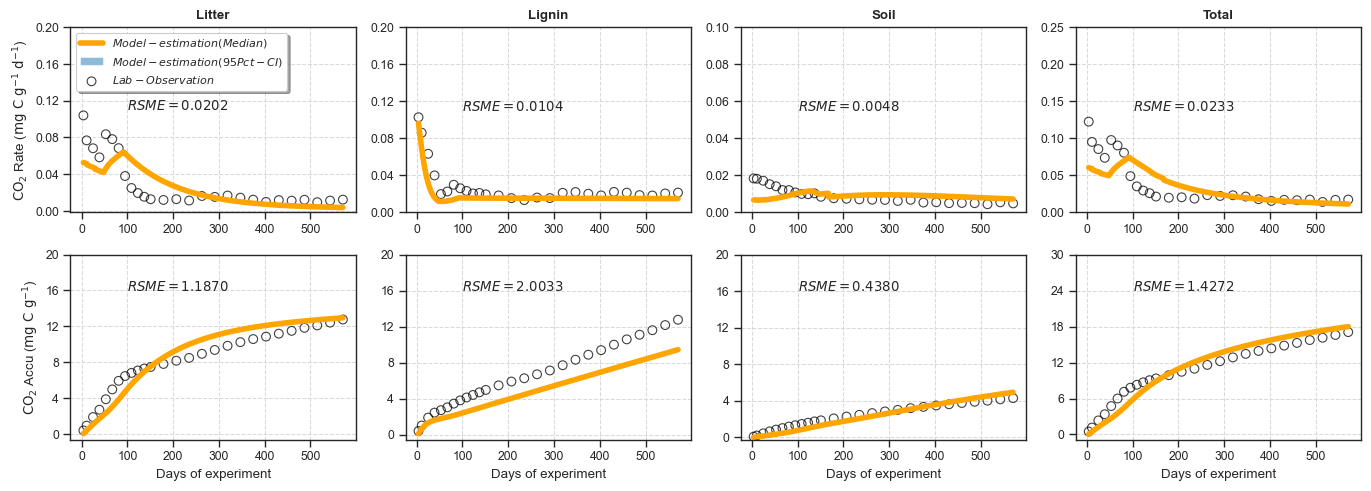

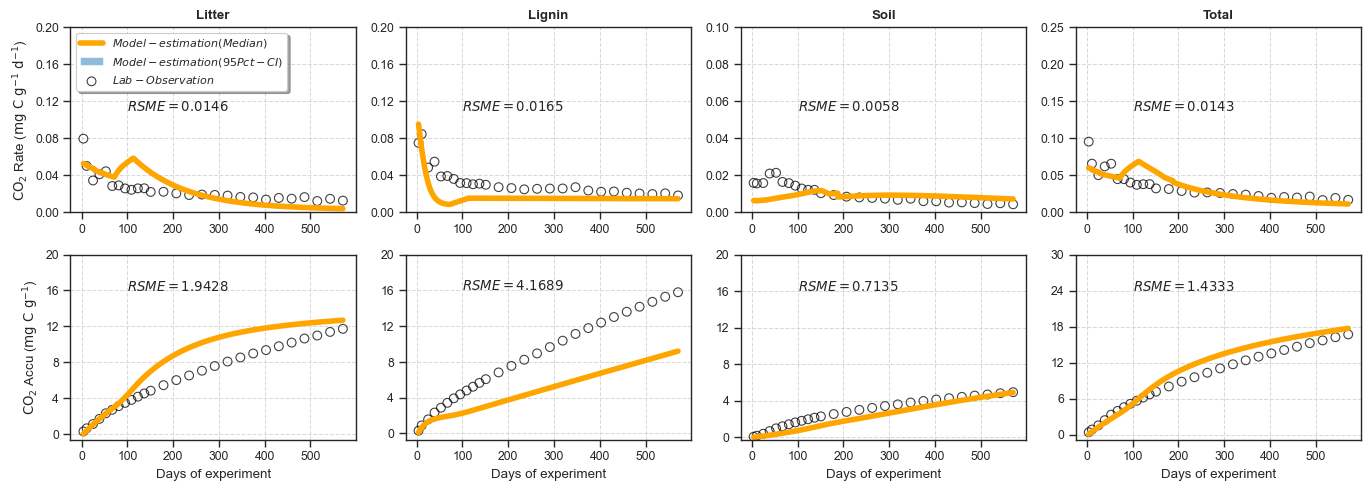

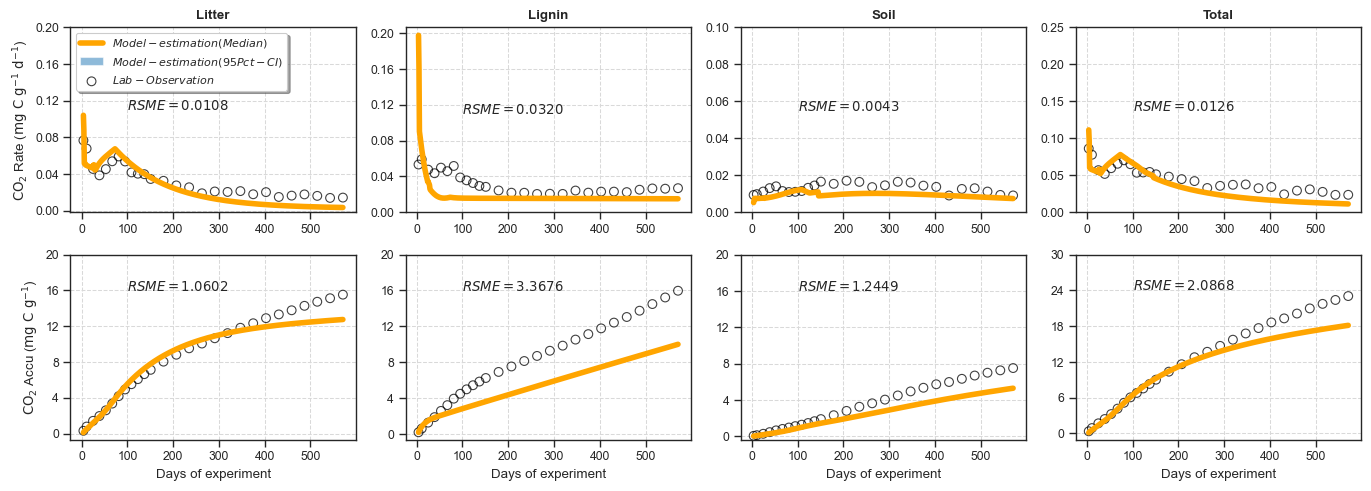

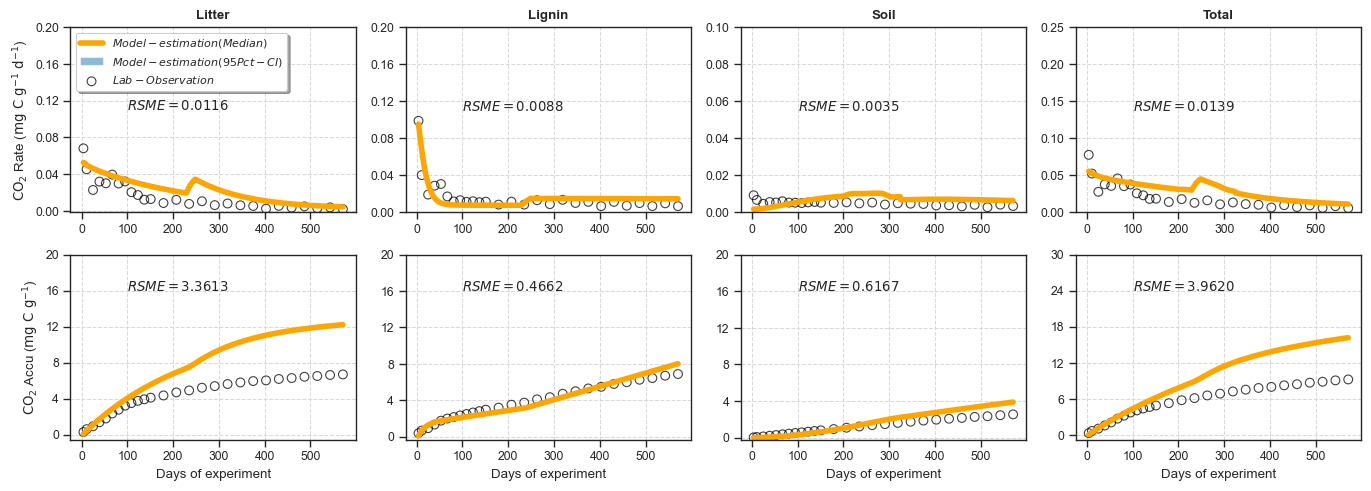

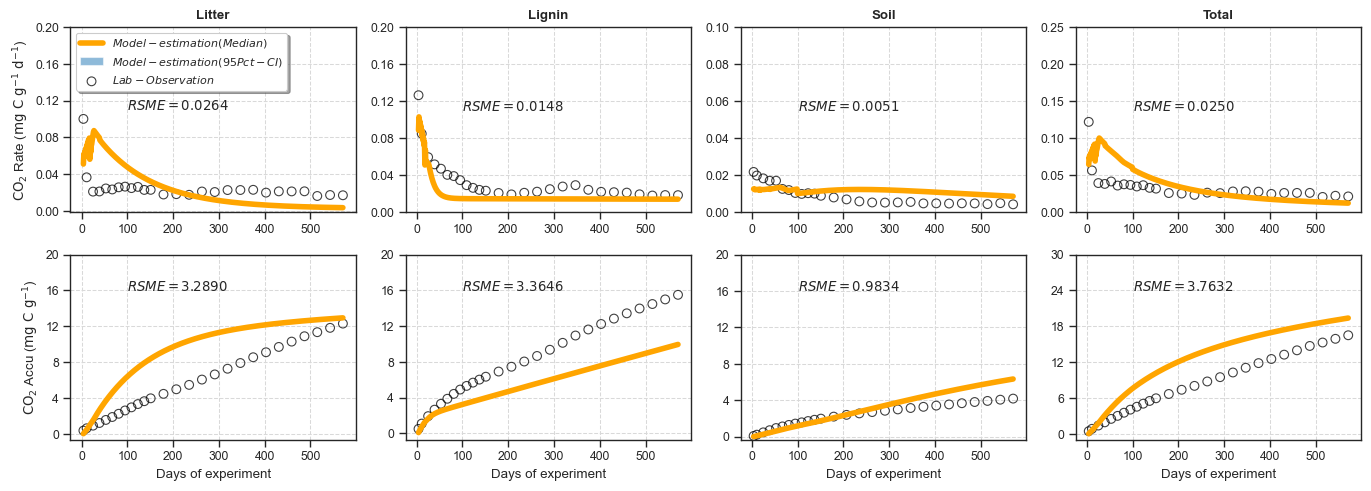

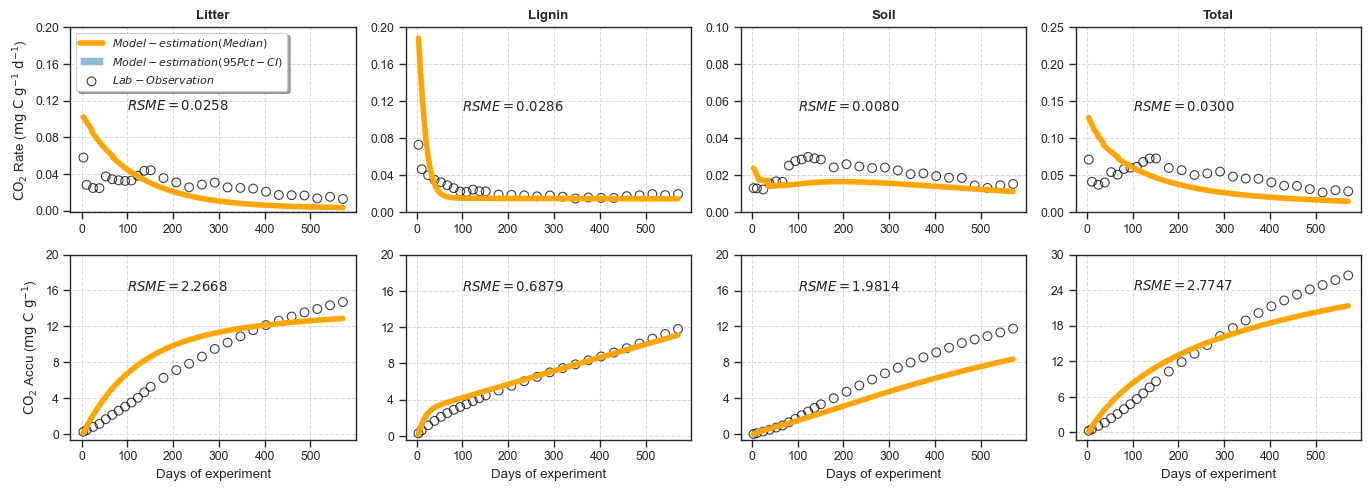

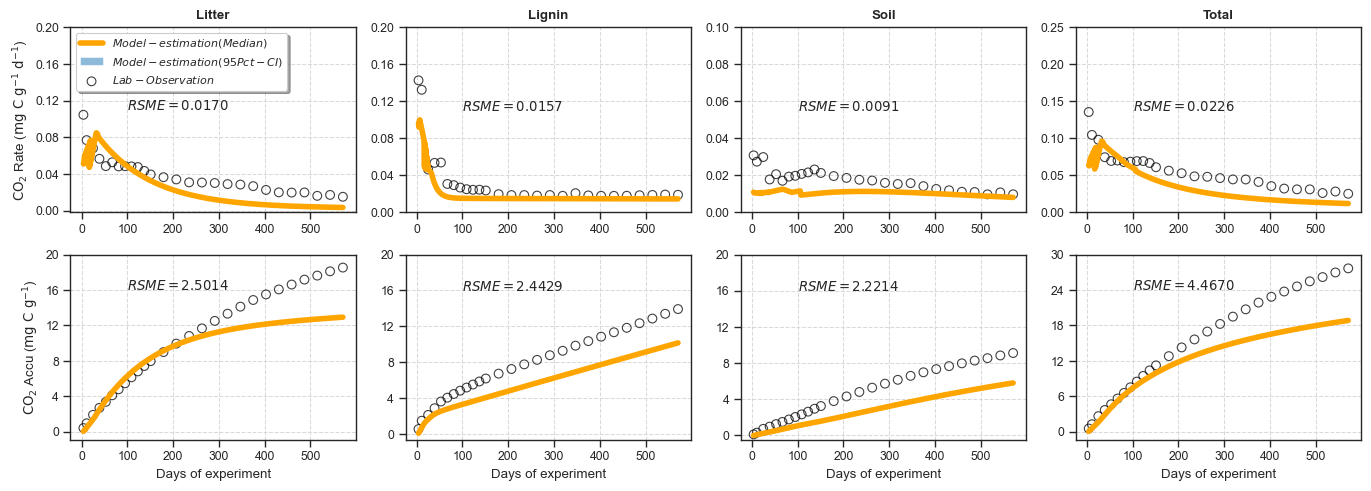

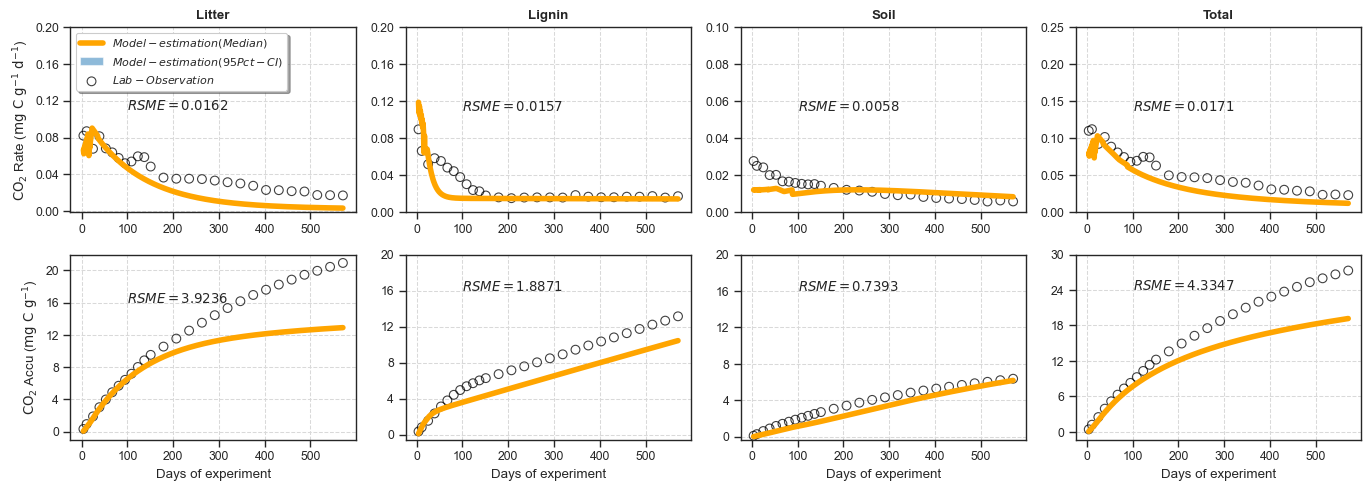

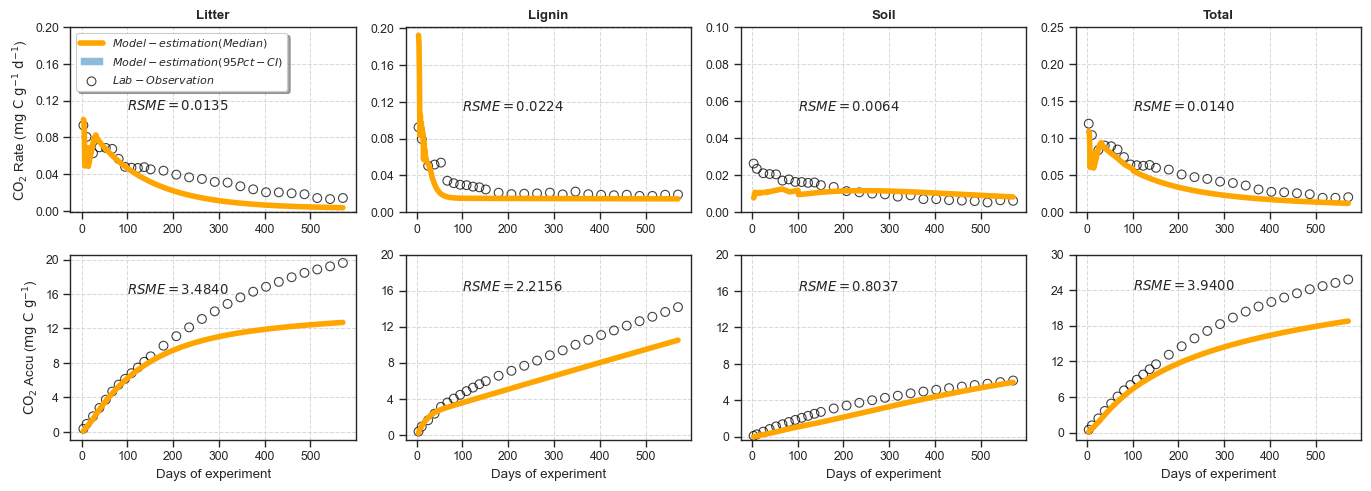

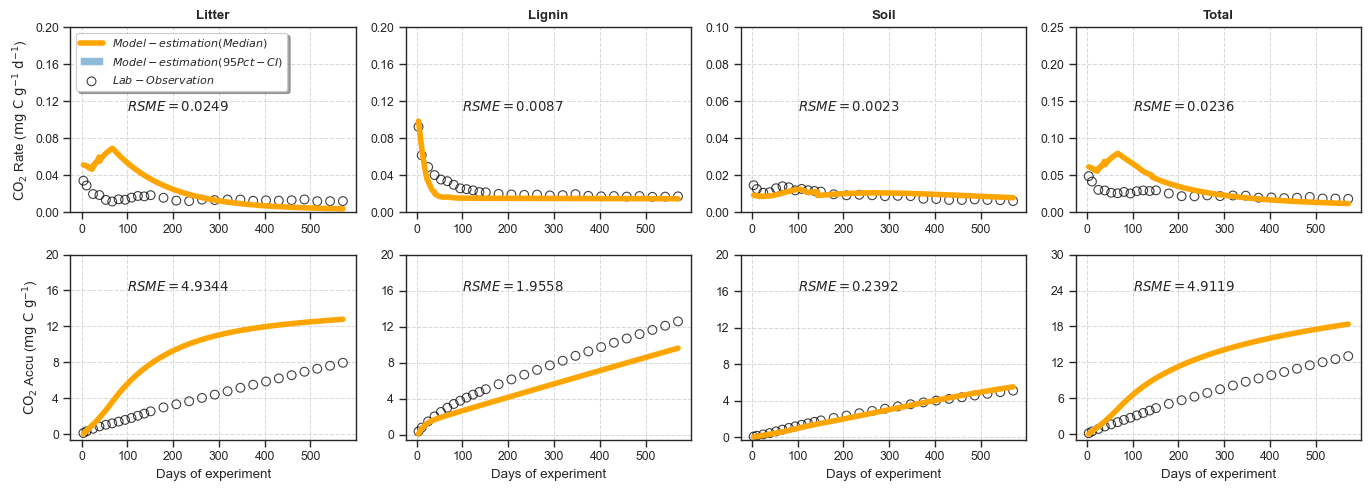

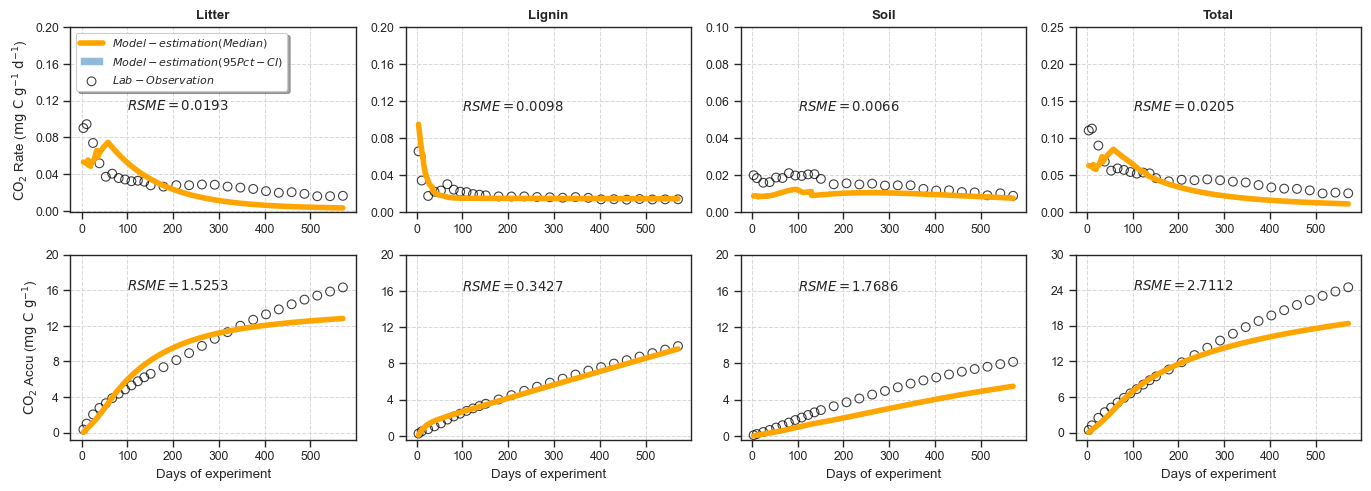

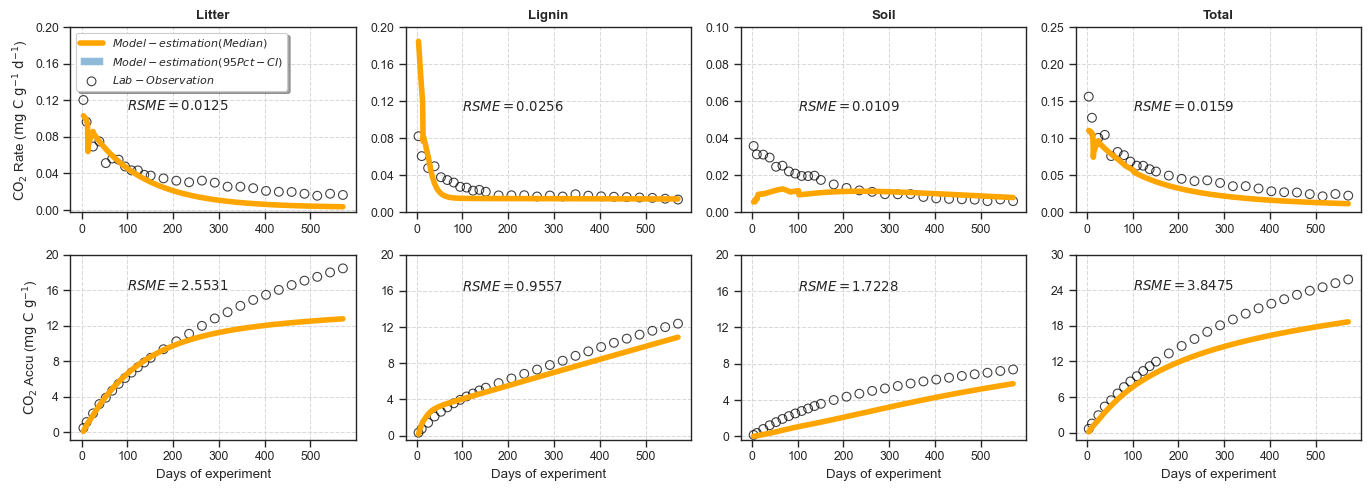

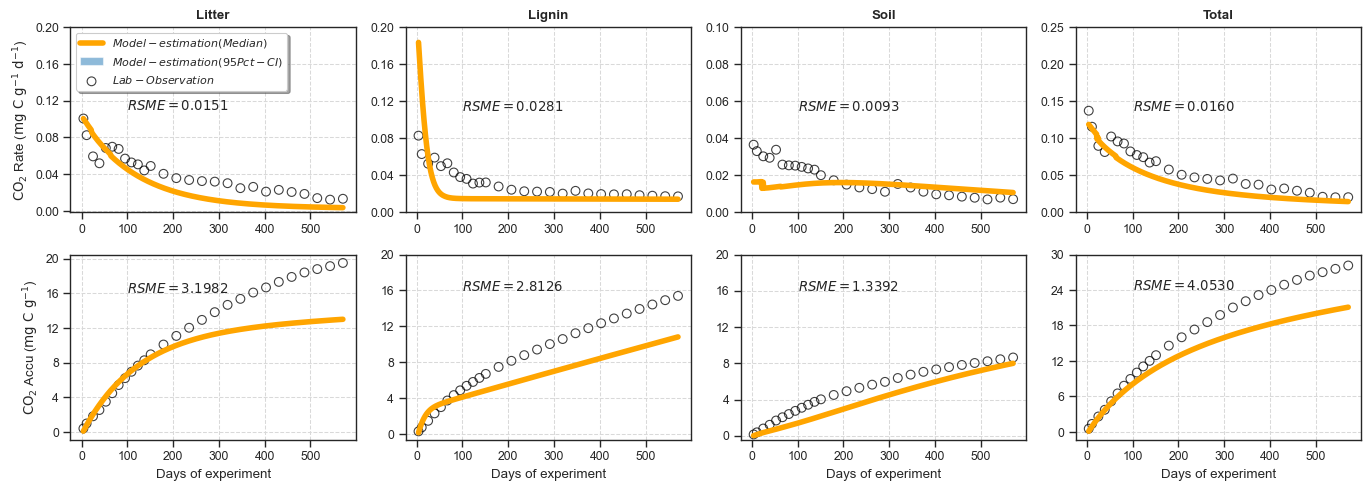

In [5]:
for sample_site in valid_site_index:
    print(sample_site)
    
    ###----------------------------------------------------------------------Data:Rate----------------------------------------------------------------------------------------####
    ###----------------------------------------------------------------------Data:Rate----------------------------------------------------------------------------------------####
    ###----------------------------------------------------------------------Data:Rate----------------------------------------------------------------------------------------####
    ###Data:Rate###
    data_obs       = pd.read_csv(r'.\labObser_lss\{Site_Num}_lss_labObser.csv'.format(Site_Num=sample_site),delimiter=',')
    y_obs_rate     = data_obs.loc[:,'Obser_rate']
    y_obs_litrate  = data_obs.loc[:,'litter_rate']
    y_obs_ligrate  = data_obs.loc[:,'lignin_rate']
    y_obs_soilrate = data_obs.loc[:,'soil_rate']
    x_obs          = data_obs.iloc[:,0]

    data_uq        = pd.read_csv(r'./modelResult_lss/validationResult_1001/{Site_Num}_lss_total.csv'.format(Site_Num=sample_site),delimiter=',',header=None).iloc[:,3:]
    y_uqmean       = data_uq.mean(axis=0)
    y_uqstd        = data_uq.std(axis=0)
    y_uqmedian     = data_uq.median(axis=0)
#     CI95_uq        = st.norm.interval(alpha=0.6,loc=np.mean(data_uq), scale=st.sem(data_uq))
#     CI95_uq        = st.t.interval(alpha=0.6,df=data_uq.shape[0]-1, loc=np.mean(data_uq), scale=st.sem(data_uq))
#     y_uqmax        = CI95_uq[0]
#     y_uqmin        = CI95_uq[1]
    y_uqmax        = y_uqmean + 2.5 * y_uqstd
    y_uqmin        = y_uqmean - 2.5 * y_uqstd
    x_uq           = np.arange(4,data_uq.shape[1]+4,1)   # Start from the 4th day

    data_uqlit     = pd.read_csv(r'.\modelResult_lss\validationResult_1001\{Site_Num}_lss_litter.csv'.format(Site_Num=sample_site),delimiter=',',header=None).iloc[:,3:]
    y_uqlitmean    = data_uqlit.mean(axis=0)
    y_uqlitstd     = data_uqlit.std(axis=0)
    y_uqlitmedian  = data_uqlit.median(axis=0)
#     CI95_uqlit     = st.norm.interval(alpha=0.6, loc=np.mean(data_uqlit), scale=st.sem(data_uqlit))
#     CI95_uqlit     = st.t.interval(alpha=0.6, df=data_uqlit.shape[0]-1, loc=np.mean(data_uqlit), scale=st.sem(data_uqlit))
#     y_uqlitmax     = CI95_uqlit[0]
#     y_uqlitmin     = CI95_uqlit[1]
    y_uqlitmax     = y_uqlitmean + 2.5 * y_uqlitstd
    y_uqlitmin     = y_uqlitmean - 2.5 * y_uqlitstd

    data_uqlig     = pd.read_csv(r'.\modelResult_lss\validationResult_1001\{Site_Num}_lss_lignin.csv'.format(Site_Num=sample_site),delimiter=',',header=None).iloc[:,3:]
    y_uqligmean    = data_uqlig.mean(axis=0)
    y_uqligstd     = data_uqlig.std(axis=0)
    y_uqligmedian  = data_uqlig.median(axis=0)
#     CI95_uqlig     = st.norm.interval(alpha=0.6, loc=np.mean(data_uqlig), scale=st.sem(data_uqlig))
#     CI95_uqlig     = st.t.interval(alpha=0.6, df=data_uqlig.shape[0]-1, loc=np.mean(data_uqlig), scale=st.sem(data_uqlig))
#     y_uqligmax     = CI95_uqlig[0]
#     y_uqligmin     = CI95_uqlig[1]
    y_uqligmax     = y_uqligmean + 2.5 * y_uqligstd 
    y_uqligmin     = y_uqligmean - 2.5 * y_uqligstd

    data_uqsoil    = pd.read_csv(r'.\modelResult_lss\validationResult_1001\{Site_Num}_lss_soil.csv'.format(Site_Num=sample_site),delimiter=',',header=None).iloc[:,3:]
    y_uqsoilmean   = data_uqsoil.mean(axis=0)
    y_uqsoilstd    = data_uqsoil.std(axis=0)
    y_uqsoilmedian = data_uqsoil.median(axis=0)
#     CI95_uqsoil    = st.norm.interval(alpha=0.6, loc=np.mean(data_uqsoil), scale=st.sem(data_uqsoil))
#     CI95_uqlig     = st.t.interval(alpha=0.6, df=data_uqsoil.shape[0]-1, loc=np.mean(data_uqsoil), scale=st.sem(data_uqsoil))
#     y_uqsoilmax    = CI95_uqsoil[0]
#     y_uqsoilmin    = CI95_uqsoil[1]
    y_uqsoilmax    = y_uqsoilmean + 2.5 * y_uqsoilstd
    y_uqsoilmin    = y_uqsoilmean - 2.5 * y_uqsoilstd
    
    ###--------------------------------------------------------------------------------Data:Accumulation-----------------------------------------------------------------------------------####
    ###Data:Accumulation###
    y_obs_accu         = data_obs.loc[:,'Obser_total']
    y_obs_litaccu      = data_obs.loc[:,'litter_total']
    y_obs_ligaccu      = data_obs.loc[:,'lignin_total']
    y_obs_soilaccu     = data_obs.loc[:,'soil_total']

    datauq_accu        = data_uq.cumsum(1)
    y_uqmax_accu       = datauq_accu.max(axis=0)
    y_uqmin_accu       = datauq_accu.min(axis=0)
    y_uqmean_accu      = datauq_accu.mean(axis=0)
    y_uqstd_accu       = datauq_accu.std(axis=0)
    y_uqmedian_accu    = datauq_accu.median(axis=0)

    datauqlit_accu     = data_uqlit.cumsum(1)
    y_uqlitmax_accu    = datauqlit_accu.max(axis=0)
    y_uqlitmin_accu    = datauqlit_accu.min(axis=0)
    y_uqlitmean_accu   = datauqlit_accu.mean(axis=0)
    y_uqlitstd_accu    = datauqlit_accu.std(axis=0)
    y_uqlitmedian_accu = datauqlit_accu.median(axis=0)

    datauqlig_accu     = data_uqlig.cumsum(1)
    y_uqligmax_accu    = datauqlig_accu.max(axis=0)
    y_uqligmin_accu    = datauqlig_accu.min(axis=0)
    y_uqligmean_accu   = datauqlig_accu.mean(axis=0)
    y_uqligstd_accu    = datauqlig_accu.std(axis=0)
    y_uqligmedian_accu = datauqlig_accu.median(axis=0)

    datauqsoil_accu     = data_uqsoil.cumsum(1)
    y_uqsoilmax_accu    = datauqsoil_accu.max(axis=0)
    y_uqsoilmin_accu    = datauqsoil_accu.min(axis=0)
    y_uqsoilmean_accu   = datauqsoil_accu.mean(axis=0)
    y_uqsoilstd_accu    = datauqsoil_accu.std(axis=0)
    y_uqsoilmedian_accu = datauqsoil_accu.median(axis=0)
    
    
    ###------------------------------------------------------------------------------Model Result----------------------------------------------------------------------####
    ###------------------------------------------------------------------------------Model Result----------------------------------------------------------------------####
    ###------------------------------------------------------------------------------Model Result----------------------------------------------------------------------####
    
    ###Result: Total###
    result_total       = np.zeros((len(x_uq),15))
    result_total[:,0]  = (x_uq)
    result_total[:,1]  = (y_uqmax)
    result_total[:,2]  = (y_uqmin)
    result_total[:,3]  = (y_uqmean)
    result_total[:,4]  = (y_uqstd)
    result_total[:,5]  = (y_uqmedian)
    result_total[:,6]  = (y_uqmax_accu)
    result_total[:,7]  = (y_uqmin_accu)
    result_total[:,8]  = (y_uqmean_accu)
    result_total[:,9]  = (y_uqstd_accu)
    result_total[:,10] = (y_uqmedian_accu)
    y_uqrateRSME       = np.sqrt(((np.float32(y_uqmean[x_obs-1])-np.float32(y_obs_rate))**2).mean())
    y_uqaccuRSME       = np.sqrt(((np.float32(y_uqmean_accu[x_obs-1])-np.float32(y_obs_accu))**2).mean())
    y_uqratersme       = math.sqrt(sklearn.metrics.mean_squared_error(y_obs_rate, y_uqmean[x_obs-1]))
    y_uqaccursme       = math.sqrt(sklearn.metrics.mean_squared_error(y_obs_accu, y_uqmean_accu[x_obs-1]))
    result_total[:,11] = (y_uqrateRSME)
    result_total[:,12] = (y_uqaccuRSME)
    result_total[:,13] = (y_uqratersme)
    result_total[:,14] = (y_uqaccursme)

    np.savetxt('./modelResult_lss/validationResult_1001/Result_{Site_Num}_lss_total_{timer}.csv'.format(Site_Num=sample_site,timer=time.strftime("%m%d%Y")),result_total,  
               delimiter=",",header="day,ratemax,ratemin,ratemean,ratestd,ratemedian,accumax,accumin,accumean,accustd,accumedian,rateRSME,accuRSME,ratereme,accursme")
    
    ###Result: Litter###
    result_litter       = np.zeros((len(x_uq),15))
    result_litter[:,0]  = (x_uq)
    result_litter[:,1]  = (y_uqlitmax)
    result_litter[:,2]  = (y_uqlitmin)
    result_litter[:,3]  = (y_uqlitmean)
    result_litter[:,4]  = (y_uqlitstd)
    result_litter[:,5]  = (y_uqlitmedian)
    result_litter[:,6]  = (y_uqlitmax_accu)
    result_litter[:,7]  = (y_uqlitmin_accu)
    result_litter[:,8]  = (y_uqlitmean_accu)
    result_litter[:,9]  = (y_uqlitstd_accu)
    result_litter[:,10] = (y_uqlitmedian_accu)
    y_uqlitrateRSME     = np.sqrt(((np.float32(y_uqlitmean[x_obs-1])-np.float32(y_obs_litrate))**2).mean())
    y_uqlitaccuRSME     = np.sqrt(((np.float32(y_uqlitmean_accu[x_obs-1])-np.float32(y_obs_litaccu))**2).mean())
    y_uqlitratersme     = math.sqrt(sklearn.metrics.mean_squared_error(y_obs_litrate, y_uqlitmean[x_obs-1]))
    y_uqlitaccursme     = math.sqrt(sklearn.metrics.mean_squared_error(y_obs_litaccu, y_uqlitmean_accu[x_obs-1]))
    result_litter[:,11] = (y_uqlitrateRSME)
    result_litter[:,12] = (y_uqlitaccuRSME)
    result_litter[:,13] = (y_uqlitratersme)
    result_litter[:,14] = (y_uqlitaccursme)

    np.savetxt('./modelResult_lss/validationResult_1001/Result_{Site_Num}_lss_litter_{timer}.csv'.format(Site_Num=sample_site,timer=time.strftime("%Y%m%d")),result_litter,  
               delimiter=",",header="day,ratemax,ratemin,ratemean,ratestd,ratemedian,accumax,accumin,accumean,accustd,accumedian,rateRSME,accuRSME,ratersme,accursme")
    
    ###Result: Soil###
    result_soil       = np.zeros((len(x_uq),15))
    result_soil[:,0]  = (x_uq)
    result_soil[:,1]  = (y_uqsoilmax)
    result_soil[:,2]  = (y_uqsoilmin)
    result_soil[:,3]  = (y_uqsoilmean)
    result_soil[:,4]  = (y_uqsoilstd)
    result_soil[:,5]  = (y_uqsoilmedian)
    result_soil[:,6]  = (y_uqsoilmax_accu)
    result_soil[:,7]  = (y_uqsoilmin_accu)
    result_soil[:,8]  = (y_uqsoilmean_accu)
    result_soil[:,9]  = (y_uqsoilstd_accu)
    result_soil[:,10] = (y_uqsoilmedian_accu)
    y_uqsoilrateRSME  = np.sqrt(((np.float32(y_uqsoilmean[x_obs-1])-np.float32(y_obs_soilrate))**2).mean())
    y_uqsoilaccuRSME  = np.sqrt(((np.float32(y_uqsoilmean_accu[x_obs-1])-np.float32(y_obs_soilaccu))**2).mean())
    y_uqsoilratersme   = math.sqrt(sklearn.metrics.mean_squared_error(y_obs_soilrate, y_uqsoilmean[x_obs-1]))
    y_uqsoilaccursme   = math.sqrt(sklearn.metrics.mean_squared_error(y_obs_soilaccu, y_uqsoilmean_accu[x_obs-1]))
    result_soil[:,11] = (y_uqsoilrateRSME)
    result_soil[:,12] = (y_uqsoilaccuRSME)
    result_soil[:,13] = (y_uqsoilratersme)
    result_soil[:,14] = (y_uqsoilaccursme)

    np.savetxt('./modelResult_lss/validationResult_1001/Result_{Site_Num}_lss_soil_{timer}.csv'.format(Site_Num=sample_site,timer=time.strftime("%Y%m%d")),result_soil,  
               delimiter=",",header="day,ratemax,ratemin,ratemean,ratestd,ratemedian,accumax,accumin,accumean,accustd,accumedian,rateRSME,accuRSME,ratersme,accursme")

    ###Result: Lignin###
    result_lignin       = np.zeros((len(x_uq),15))
    result_lignin[:,0]  = (x_uq)
    result_lignin[:,1]  = (y_uqligmax)
    result_lignin[:,2]  = (y_uqligmin)
    result_lignin[:,3]  = (y_uqligmean)
    result_lignin[:,4]  = (y_uqligstd)
    result_lignin[:,5]  = (y_uqligmedian)
    result_lignin[:,6]  = (y_uqligmax_accu)
    result_lignin[:,7]  = (y_uqligmin_accu)
    result_lignin[:,8]  = (y_uqligmean_accu)
    result_lignin[:,9]  = (y_uqligstd_accu)
    result_lignin[:,10] = (y_uqligmedian_accu)
    y_uqligrateRSME     = round(np.sqrt(((np.float32(y_uqligmean[x_obs-1])-np.float32(y_obs_ligrate))**2).mean()),4)
    y_uqligaccuRSME     = np.sqrt(((np.float32(y_uqligmean_accu[x_obs-1])-np.float32(y_obs_ligaccu))**2).mean())
    y_uqligratersme     = math.sqrt(sklearn.metrics.mean_squared_error(y_obs_ligrate, y_uqligmean[x_obs-1]))
    y_uqligaccursme     = math.sqrt(sklearn.metrics.mean_squared_error(y_obs_ligaccu, y_uqligmean_accu[x_obs-1]))
    result_lignin[:,11] = (y_uqligrateRSME)
    result_lignin[:,12] = (y_uqligaccuRSME)
    result_lignin[:,13] = (y_uqligratersme)
    result_lignin[:,14] = (y_uqligaccursme)

    np.savetxt('./modelResult_lss/validationResult_1001/Result_{Site_Num}_lss_lignin_{timer}.csv'.format(Site_Num=sample_site,timer=time.strftime("%Y%m%d")),result_lignin,  
               delimiter=",",header="day,ratemax,ratemin,ratemean,ratestd,ratemedian,accumax,accumin,accumean,accustd,accumedian,rateRSME,accuRSME,ratersme,accursme")
    
    
    ###-------------------------------------------------------------------------lab-model 1:1 comparison-----------------------------------------------------------------####
    ###-------------------------------------------------------------------------lab-model 1:1 comparison-----------------------------------------------------------------#### 
    ###-------------------------------------------------------------------------lab-model 1:1 comparison-----------------------------------------------------------------####
    
    # "day,ratemax,ratemin,ratemean,ratestd,ratemedian,accumax,accumin,accumean,accustd,accumedian,rateRSME,accuRSME"
    totalRateuq = result_total [(x_obs-4),:][:,[0,5,10]]
    litRateuq   = result_litter[(x_obs-4),:][:,[0,5,10]]
    ligRateuq   = result_lignin[(x_obs-4),:][:,[0,5,10]]
    soilRateuq  = result_soil  [(x_obs-4),:][:,[0,5,10]]
    ###Lab Observation###
    totalRatelab = y_obs_rate
    litRatelab   = y_obs_litrate
    ligRatelab   = y_obs_ligrate
    soilRatelab  = y_obs_soilrate
    totalAcculab = y_obs_accu
    litAcculab   = y_obs_litaccu
    ligAcculab   = y_obs_ligaccu
    soilAcculab  = y_obs_soilaccu
    # Model: day,totalRate,totalAccu,litterRate,litterAccu,ligninRate,ligninAccu,soilRate,soilAccu #
    # Lab : totalRate,totalAccu,litterRate,litterAccu,ligninRate,ligninAccu,soilRate,soilAccu #
    labModelResult = np.zeros((27,17))
    labModelResult[:,0]    = x_obs
    labModelResult[:,1:3]  = totalRateuq[:,1:3]
    labModelResult[:,3:5]  = litRateuq[:,1:3]
    labModelResult[:,5:7]  = ligRateuq[:,1:3]
    labModelResult[:,7:9]  = soilRateuq[:,1:3]
    labModelResult[:,9]    = totalRatelab
    labModelResult[:,10]   = totalAcculab
    labModelResult[:,11]   = litRatelab
    labModelResult[:,12]   = litAcculab
    labModelResult[:,13]   = ligRatelab
    labModelResult[:,14]   = ligAcculab
    labModelResult[:,15]   = soilRatelab
    labModelResult[:,16]   = soilAcculab

    np.savetxt('./modelResult_lss/labValid_1to1_1001/{Site_Num}_1to1.csv'.format(Site_Num=sample_site),labModelResult,delimiter=",",  
               header="day,totalrateuq,totalaccuuq,litrateuq,litaccuuq,ligrateuq,ligaccuuq,soilrateuq,soilaccuuq,totalratelab,totalacculab,litratelab,litacculab,ligratelab,ligacculab,soilratelab,soilacculab")

    ###--------------------------------------------------------------------------------lab-model comparison------------------------------------------------------------------------####
    ###--------------------------------------------------------------------------------lab-model comparison------------------------------------------------------------------------####
    ###--------------------------------------------------------------------------------lab-model comparison------------------------------------------------------------------------####
    ###--------------------------------------------------------------------------------lab-model comparison------------------------------------------------------------------------####
    ###--------------------------------------------------------------------------------lab-model comparison------------------------------------------------------------------------####
    ###--------------------------------------------------------------------------------lab-model comparison------------------------------------------------------------------------####
    ###--------------------------------------------------------------------------------lab-model comparison------------------------------------------------------------------------####
    ###--------------------------------------------------------------------------------lab-model comparison------------------------------------------------------------------------####
    ###--------------------------------------------------------------------------------lab-model comparison------------------------------------------------------------------------####
    
    #Plot Setting#
    sns.set_style('ticks')                                       # darkgrid, whitegrid, dark, white, ticks
    sns.set_context(context="paper",font_scale=1, rc=None)       # notebook, paper", "talk", and "poster"
    sns.color_palette("tab10")
    fig = plt.figure(figsize=(13.8,5),dpi=100)

    ###Plot1 : Litter Rate###
    ax1 = fig.add_subplot(2,4,1)
    plt.plot(x_uq,y_uqlitmedian,color='orange', label='$Model-estimation(Median)$',linewidth=4) 
    plt.fill_between(x_uq,y_uqlitmin,y_uqlitmax,label=r'$Model-estimation(95Pct-CI)$',alpha=0.5)                  # linestyle='-',linewidth=1,
    plt.scatter(x_obs,y_obs_litrate,marker='o',c='',edgecolors='k',label=r'$Lab-Observation$',s=40,alpha=0.75)
    plt.title(r"Litter",fontweight='bold')
    plt.legend(loc='upper left',shadow=True,fontsize='small') # fontsize='medium',frameon=False,loc='best' 
    plt.ylabel(r'$\rm CO_2$ Rate ($\rm mg \ C \ g^{-1} \ d^{-1}$)')
    plt.yticks(np.linspace(0,0.2,6,endpoint=True))
    plt.text(100,0.11,'$RSME = {:.4f}$'.format(y_uqlitrateRSME,4),fontweight='bold')
    plt.grid(linestyle='--',c='0.85',linewidth=0.75)
    plt.tight_layout()

    ###Plot2: litter Accum###
    ax2 = fig.add_subplot(2,4,5)
    plt.plot(x_uq,y_uqlitmean_accu,color='orange',label='Model estimation  (Median)',linewidth=4) 
    plt.fill_between(x_uq,y_uqlitmin_accu,y_uqlitmax_accu,label='Model estimation  (95% CI)',alpha=0.5)
    plt.scatter(x_obs,y_obs_litaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
    plt.xlabel('Days of experiment')
    #plt.title(r"Cumulative Mineralization",fontweight='bold')
    plt.ylabel(r'$\rm CO_2$ Accu ($\rm mg \ C \ g^{-1}$)')
    plt.yticks(np.linspace(0,20,6,endpoint=True))
    plt.text(100,16,'$RSME = {:.4f}$'.format(y_uqlitaccuRSME,4),fontweight='bold')
    plt.grid(linestyle='--',c='0.85',linewidth=0.75)
    plt.tight_layout()

    ###Plot3: Lignin Rate###
    ax3 = fig.add_subplot(2,4,2)
    plt.plot(x_uq,y_uqligmedian,color='orange',label='Model estimation  (Median)',linewidth=4)
    plt.fill_between(x_uq,y_uqligmin,y_uqligmax,label='Model estimation  (95% CI)',alpha=0.5)
    plt.scatter(x_obs,y_obs_ligrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
    plt.title(r"Lignin",fontweight='bold')
    #plt.ylabel(r'Lignin $\rm CO_2$ ($\rm ug \cdot C \cdot g^{-1} \cdot d^{-1}$)')
    plt.yticks(np.linspace(0,0.2,6,endpoint=True))
    plt.text(100,0.11,'$RSME = {:.4f}$'.format(y_uqligrateRSME,4),fontweight='bold')
    plt.grid(linestyle='--',c='0.85',linewidth=0.75)
    plt.tight_layout()

    ###Plot4: Lignin Accum###
    ax4 = fig.add_subplot(2,4,6)
    plt.plot(x_uq,y_uqligmean_accu,color='orange',label='Model estimation  (Median)',linewidth=4)
    plt.fill_between(x_uq,y_uqligmin_accu,y_uqligmax_accu,label='Model estimation  (95% CI)',alpha=0.5)
    plt.scatter(x_obs,y_obs_ligaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
    plt.xlabel('Days of experiment')
    #plt.ylabel(r'Lignin $\rm CO_2$ ($\rm ug \cdot C \cdot g^{-1}$)')
    plt.yticks(np.linspace(0,20,6,endpoint=True))
    plt.text(100,16,'$RSME = {:.4f}$'.format(y_uqligaccuRSME),fontweight='bold')
    plt.grid(linestyle='--',c='0.85',linewidth=0.75)
    plt.tight_layout()

    ###Plot5: Soil Rate###
    ax5 = fig.add_subplot(2,4,3)
    plt.plot(x_uq,y_uqsoilmedian,color='orange',label='Model estimation  (Median)',linewidth=4)
    plt.fill_between(x_uq,y_uqsoilmin,y_uqsoilmax,label='Model estimation  (95% CI)',alpha=0.5)
    plt.scatter(x_obs,y_obs_soilrate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
    plt.title(r"Soil",fontweight='bold')
    #plt.ylabel(r'Soil $\rm CO_2$ ($\rm mg \cdot C \cdot g^{-1} \cdot d^{-1}$)')
    plt.yticks(np.linspace(0,0.1,6,endpoint=True))
    plt.text(100,0.055,'$RSME = {:.4f}$'.format(y_uqsoilrateRSME,4),fontweight='bold')
    plt.grid(linestyle='--',c='0.85',linewidth=0.75)
    plt.tight_layout()

    ###Plot6: Soil Accum###
    ax6 = fig.add_subplot(2,4,7)
    plt.plot(x_uq,y_uqsoilmean_accu,color='orange',label='Model estimation  (Median)',linewidth=4) 
    plt.fill_between(x_uq,y_uqsoilmin_accu,y_uqsoilmax_accu,label='Model estimation  (95% CI)',alpha=0.5)
    plt.scatter(x_obs,y_obs_soilaccu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
    plt.xlabel('Days of experiment')
    #plt.ylabel(r'Soil $\rm CO_2$ ($\rm mg \cdot C \cdot g^{-1}$)')
    plt.yticks(np.linspace(0,20,6,endpoint=True))
    plt.text(100,16,'$RSME = {:.4f}$'.format(y_uqsoilaccuRSME,4),fontweight='bold')
    plt.grid(linestyle='--',c='0.85',linewidth=0.75)
    plt.tight_layout()

    ###Plot7: Total Rate###
    ax7 = fig.add_subplot(2,4,4)
    plt.plot(x_uq,y_uqmedian,color='orange',label='Model estimation(Median)',linewidth=4) 
    plt.fill_between(x_uq,y_uqmin,y_uqmax,label='Model estimation  (95% CI)',alpha=0.5)
    plt.scatter(x_obs,y_obs_rate,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
    plt.title(r"Total",fontweight='bold')
    #plt.xlabel('Days of experiment')
    #plt.ylabel(r'Total $\rm CO_2$ ($\rm mg \cdot C \cdot g^{-1} \cdot d^{-1}$)')
    plt.yticks(np.linspace(0,0.25,6,endpoint=True))
    plt.text(100,0.1375,'$RSME = {:.4f}$'.format(y_uqrateRSME),fontweight='bold')
    plt.grid(c='0.85',linestyle='--',linewidth=0.75,alpha=1)
    plt.tight_layout()

    ###Plot8: Total Accum###
    ax8 = fig.add_subplot(2,4,8)
    plt.plot(x_uq,y_uqmean_accu,color='orange',label='Model estimation(Median)',linewidth=4)                              # linestyle = '--'
    plt.fill_between(x_uq,y_uqmin_accu,y_uqmax_accu,label='Model estimation  (95% CI)',alpha=0.5)
    plt.scatter(x_obs,y_obs_accu,marker='o',c='',edgecolors='k',label='Lab Observation',s=40,alpha=0.75)
    plt.xlabel('Days of experiment')
    #plt.ylabel(r'Total $\rm CO_2$ ($\rm mg \cdot C \cdot g^{-1}$)')
    plt.yticks(np.linspace(0,30,6,endpoint=True))
    plt.text(100,24,'$RSME = {:.4f}$'.format(y_uqaccuRSME),fontweight='bold')
    plt.grid(c='0.85',linestyle='--',linewidth=0.75,alpha=1)
    plt.tight_layout()

    #plt.savefig('./figure_lss/figure_1001/valid_1001/{Site_Num}_Final_{timer}.jpg'.format(Site_Num=sample_site,timer=time.strftime("%Y%m%d%H%M")),dpi=300)
    


# ***Validation 1:1 line***

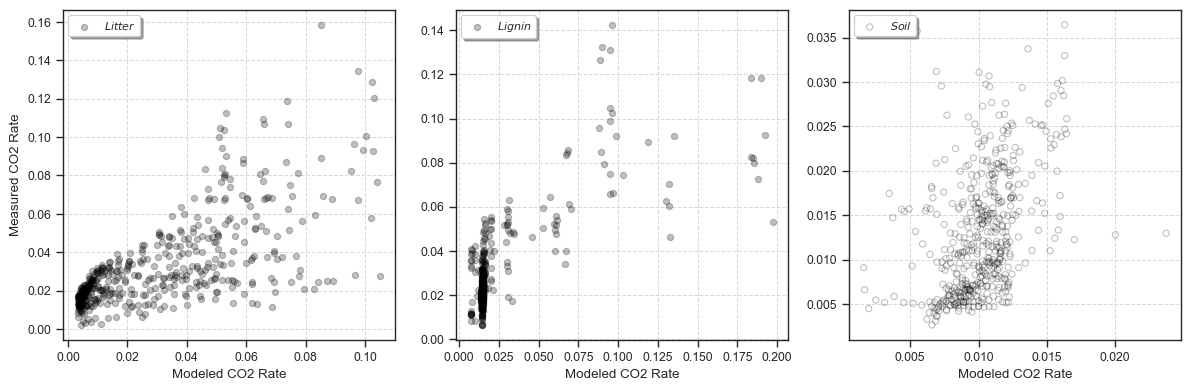

In [8]:

# Combine total/litter/lignin/soil from all sites into one file # 
totalUq   = []          # model simulation: total rate
totalLab  = []          # lab observation:  total rate
litterUq  = []          # model simulation: litter rate
litterLab = []          # lab observation:  litter rate
ligninUq  = []          # modle simulation: lignin rate
ligninLab = []          # lab observation:  lignin rate 
soilUq    = []          # model simulation: soil rate
soilLab   = []          # lab observation:  soil rate

totalUq_accu   = []     # model simulation: total accu 
totalLab_accu  = []     # lab observation:  total accu
litterUq_accu  = []     # model simulation: litter accu
litterLab_accu = []     # lab observation:  litter accu
ligninUq_accu  = []     # modle simulation: lignin accu
ligninLab_accu = []     # lab observation:  lignin accu 
soilUq_accu    = []     # model simulation: soil accu
soilLab_accu   = []     # lab observation:  soil accu

for sample_site in valid_site_index:
    data = pd.read_csv('./modelResult_lss/labValid_1to1_1001/{Site_Num}_1to1.csv'.format(Site_Num=sample_site),delimiter=',')
    totalUq.append(data.loc[:,'totalrateuq'])
    totalLab.append(data.loc[:,'totalratelab'])
    litterUq.append(data.loc[:,'litrateuq'])
    litterLab.append(data.loc[:,'litratelab'])
    ligninUq.append(data.loc[:,'ligrateuq'])
    ligninLab.append(data.loc[:,'ligratelab'])
    soilUq.append(data.loc[:,'soilrateuq'])
    soilLab.append(data.loc[:,'soilratelab'])

    totalUq_accu.append(data.loc[:,'totalaccuuq'])
    totalLab_accu.append(data.loc[:,'totalacculab'])
    litterUq_accu.append(data.loc[:,'litaccuuq'])
    litterLab_accu.append(data.loc[:,'litacculab'])
    ligninUq_accu.append(data.loc[:,'ligaccuuq'])
    ligninLab_accu.append(data.loc[:,'ligacculab'])
    soilUq_accu.append(data.loc[:,'soilaccuuq'])
    soilLab_accu.append(data.loc[:,'soilacculab'])
        

# #Plot Setting#
# sns.set_style('ticks')    # darkgrid, whitegrid, dark, white, ticks
# sns.set_context(context="paper",font_scale=1, rc=None)      # notebook, paper", "talk", and "poster"
# sns.color_palette("tab10")
# fig = plt.figure(figsize=(8,4),dpi=100)
# ###Plot###
# ax1 = fig.add_subplot(1,2,1)
# plt.scatter(totalUq,totalLab,marker='.',c='',edgecolors='k',  label='$Total-Mineralization$',s=50,alpha=0.75)
# plt.scatter(litterUq,litterLab,marker='.',c='',edgecolors='r',label='$Litter-Mineralization$',s=50,alpha=0.75)
# plt.scatter(ligninUq,ligninLab,marker='.',c='',edgecolors='b',label='$Lignin-Mineralization$',s=50,alpha=0.75)
# plt.scatter(soilUq,soilLab,marker='.',c='',edgecolors='g',    label='$Soil-Mineralization$',s=50,alpha=0.75)
# # 1to1 line
# point0 = [0,0]
# point1 = [0.35,0.35]
# plt.plot([point0[0],point1[0]],[point0[1],point1[1]],color='0.25',linestyle='dotted')
# ###Matplotlib###
# plt.title(r"Lab-Model Comparison (Mineralization Rate)",fontweight='bold')
# plt.legend(loc='upper left',shadow=True,fontsize='small')

# #plt.xlabel(r'Model simulation Rate ($\rm mg \cdot C \cdot g^{-1} \cdot d^{-1}$)')
# plt.xlabel(r'Model simulation Rate')
# plt.ylabel('Lab Observation Rate')
# plt.xticks(np.linspace(0,0.35,8,endpoint=True))
# plt.yticks(np.linspace(0,0.35,8,endpoint=True))
# #plt.text(0,0.15,'YELL-site1',fontweight='bold')
# plt.grid(c='0.85',linestyle='--',linewidth=0.75,alpha=1)
# # Draw a rectangle in Plot #
# # left, bottom, width, height = (0.0, 0.15, 0.2, 0.1)
# # rect=mpatches.Rectangle((left,bottom),width,height,fill=True,facecolor="k",color="orange",linewidth=2,alpha=0.25)
# # plt.gca().add_patch(rect)
# plt.tight_layout()





# ###Plot###
# ax2 = fig.add_subplot(1,2,2)
# plt.scatter(totalUq_accu,totalLab_accu,marker='.',c='',edgecolors='k',  label='Total Mineralization',s=50,alpha=0.75)
# plt.scatter(litterUq_accu,litterLab_accu,marker='.',c='',edgecolors='r',label='Litter Mineralization',s=50,alpha=0.75)
# plt.scatter(ligninUq_accu,ligninLab_accu,marker='.',c='',edgecolors='b',label='lignin Mineralization',s=50,alpha=0.75)
# plt.scatter(soilUq_accu,soilLab_accu,marker='.',c='',edgecolors='g',label='Soil Mineralization',s=50,alpha=0.75)
# # 1to1 line
# point0 = [0,0]
# point1 = [70,70]
# plt.plot([point0[0],point1[0]],[point0[1],point1[1]],color='0.25',linestyle='dotted')
# ###Matplotlib###
# plt.title(r"Lab-Model Comparison (Cumulative Mineralization)",fontweight='bold')
# #plt.legend(loc='best',fontsize='medium',frameon=False)
# #plt.xlabel(r'Model simulation Rate ($\rm mg \cdot C \cdot g^{-1} \cdot d^{-1}$)')
# plt.xlabel(r'Model simulation Cumulative')
# plt.ylabel('Lab Observation Cumulative')
# plt.xticks(np.linspace(0,70,8,endpoint=True))
# plt.yticks(np.linspace(0,70,8,endpoint=True))
# #plt.text(0,0.15,'YELL-site1',fontweight='bold')
# plt.grid(c='0.85',linestyle='--',linewidth=0.75,alpha=1)
# plt.tight_layout()

#plt.savefig('./figure_lss/figure_1001/ValidSites_1to1_{timer}.jpg'.format(timer=time.strftime("%Y%m%d%H%M")),dpi=300)



#Plot Setting#
sns.set_style('ticks')    # darkgrid, whitegrid, dark, white, ticks
sns.set_context(context="paper",font_scale=1, rc=None)      # notebook, paper", "talk", and "poster"
sns.color_palette("tab10")
fig = plt.figure(figsize=(12,4),dpi=100)
###Plot###
ax1 = fig.add_subplot(1,3,1)
#plt.scatter(-np.log(np.array(litterUq)),-np.log(np.array(litterLab)),marker='o',c='none',edgecolors='k',s=60,alpha=0.25,label='$Litter$')
plt.scatter((np.array(litterUq)),(np.array(litterLab)), color='k',label='$Litter$',s=20,alpha=0.25)
#1to1 line
point0 = [1.5,1.5]
point1 = [0.2,0.2]
point1 = [6.5,6.5]
#plt.plot([point0[0],point1[0]],[point0[1],point1[1]],color='0.25',linestyle='dotted')

# point0 = [-np.log(np.array(littermin)).reshape(-1),-np.log(np.array(litterLab)).reshape(-1)]    
# point1 = [-np.log(np.array(littermax)).reshape(-1),-np.log(np.array(litterLab)).reshape(-1)]
# plt.plot([point0[0],point1[0]],[point0[1],point1[1]],color='0.25',linewidth=0.95,alpha=0.5,zorder=-1)
###Matplotlib###
#plt.title(r"Lab-Model Comparison (Mineralization Rate)",fontweight='bold')
plt.legend(loc='upper left',shadow=True,fontsize='small')
#plt.xlabel(r'Model simulation Rate ($\rm mg \cdot C \cdot g^{-1} \cdot d^{-1}$)')
plt.xlabel(r'Modeled CO2 Rate')
plt.ylabel('Measured CO2 Rate')
#plt.xticks(np.linspace(0,0.35,8,endpoint=True))
#plt.yticks(np.linspace(0,0.35,8,endpoint=True))
#plt.text(0,0.15,'YELL-site1',fontweight='bold')
plt.grid(c='0.85',linestyle='--',linewidth=0.75,alpha=1)
#plt.text(1,8,'N=1620',size=16)
plt.tight_layout()


ax2 = fig.add_subplot(1,3,2)
#plt.scatter(-np.log(np.array(ligninUq)),-np.log(np.array(ligninLab)),marker='o',c='none',edgecolors='k',s=60,alpha=0.25,label='$Lignin$')
plt.scatter((np.array(ligninUq)),(np.array(ligninLab)),color='k',label='$Lignin$',s=20,alpha=0.25)
#1to1 line
point0 = [1.5,1.5]
point1 = [0.25,0.25]
point1 = [5.5,5.5]
#plt.plot([point0[0],point1[0]],[point0[1],point1[1]],color='0.25',linestyle='dotted')

# point0 = [-np.log(np.array(ligninmin)).reshape(-1),-np.log(np.array(ligninLab)).reshape(-1)]    
# point1 = [-np.log(np.array(ligninmax)).reshape(-1),-np.log(np.array(ligninLab)).reshape(-1)]
# plt.plot([point0[0],point1[0]],[point0[1],point1[1]],color='0.25',alpha=0.5,zorder=-1)
###Matplotlib###
#plt.title(r"Lab-Model Comparison (Mineralization Rate)",fontweight='bold')
plt.legend(loc='upper left',shadow=True,fontsize='small')
#plt.xlabel(r'Model simulation Rate ($\rm mg \cdot C \cdot g^{-1} \cdot d^{-1}$)')
plt.xlabel(r'Modeled CO2 Rate')
#plt.ylabel('Measured CO2 Rate')
#plt.xticks(np.linspace(0,0.35,8,endpoint=True))
#plt.yticks(np.linspace(0,0.35,8,endpoint=True))
#plt.text(0,0.15,'YELL-site1',fontweight='bold')
plt.grid(c='0.85',linestyle='--',linewidth=0.75,alpha=1)
# Draw a rectangle in Plot #
plt.tight_layout()


ax3 = fig.add_subplot(1,3,3)
#plt.scatter(-np.log(np.array(soilUq)),-np.log(np.array(soilLab)),marker='o',c='none',edgecolors='k',label='$Soil$',s=60,alpha=0.55)
plt.scatter((np.array(soilUq)),(np.array(soilLab)),marker='o',c='none',edgecolors='k',label='$Soil$',s=20,alpha=0.25)
#1to1 line
point0 = [3,3]
point1 = [0.1,0.1]
point1 = [6.5,6.5]
#plt.plot([point0[0],point1[0]],[point0[1],point1[1]],color='0.25',linestyle='dotted')

# point0 = [-np.log(np.array(soilmin)).reshape(-1),-np.log(np.array(soilLab)).reshape(-1)]    
# point1 = [-np.log(np.array(soilmax)).reshape(-1),-np.log(np.array(soilLab)).reshape(-1)]
# plt.plot([point0[0],point1[0]],[point0[1],point1[1]],color='gray',alpha=0.5,zorder=-1)

###Matplotlib###
#plt.title(r"Lab-Model Comparison (Mineralization Rate)",fontweight='bold')
plt.legend(loc='upper left',shadow=True,fontsize='small')
#plt.xlabel(r'Model simulation Rate ($\rm mg \cdot C \cdot g^{-1} \cdot d^{-1}$)')
plt.xlabel(r'Modeled CO2 Rate')
#plt.ylabel('Measured CO2 Rate')
#plt.xticks(np.linspace(0,0.35,8,endpoint=True))
#plt.yticks(np.linspace(0,0.35,8,endpoint=True))
#plt.text(0,0.15,'YELL-site1',fontweight='bold')
plt.grid(c='0.85',linestyle='--',linewidth=0.75,alpha=1)
# Draw a rectangle in Plot #
# left, bottom, width, height = (0.0, 0.15, 0.2, 0.1)
# rect=mpatches.Rectangle((left,bottom),width,height,fill=True,facecolor="k",color="orange",linewidth=2,alpha=0.25)
#plt.gca().add_patch(rect)
plt.tight_layout()


#plt.axhline(y=0,ls='--',lw=1,color='k',label='Influential parameters')

plt.savefig('./figure_lss/figure_1001/AllSites_1to1_prior{timer}S1.jpg'.format(timer=time.strftime("%Y%m%d%H%M")),dpi=300)


In [ ]:

# Combine total/litter/lignin/soil from all sites into one file # 
totalUq   = []          # model simulation: total rate
totalLab  = []          # lab observation:  total rate
litterUq  = []          # model simulation: litter rate
litterLab = []          # lab observation:  litter rate
ligninUq  = []          # modle simulation: lignin rate
ligninLab = []          # lab observation:  lignin rate 
soilUq    = []          # model simulation: soil rate
soilLab   = []          # lab observation:  soil rate

totalUq_accu   = []     # model simulation: total accu 
totalLab_accu  = []     # lab observation:  total accu
litterUq_accu  = []     # model simulation: litter accu
litterLab_accu = []     # lab observation:  litter accu
ligninUq_accu  = []     # modle simulation: lignin accu
ligninLab_accu = []     # lab observation:  lignin accu 
soilUq_accu    = []     # model simulation: soil accu
soilLab_accu   = []     # lab observation:  soil accu

for sample_site in valid_site_index:
    data = pd.read_csv('./modelResult_lss/labModel_1to1_1001/bestEstimate/{Site_Num}_1to1.csv'.format(Site_Num=sample_site),delimiter=',')
    totalUq.append(data.loc[:,'totalrateuq'])
    totalLab.append(data.loc[:,'totalratelab'])
    litterUq.append(data.loc[:,'litrateuq'])
    litterLab.append(data.loc[:,'litratelab'])
    ligninUq.append(data.loc[:,'ligrateuq'])
    ligninLab.append(data.loc[:,'ligratelab'])
    soilUq.append(data.loc[:,'soilrateuq'])
    soilLab.append(data.loc[:,'soilratelab'])

    totalUq_accu.append(data.loc[:,'totalaccuuq'])
    totalLab_accu.append(data.loc[:,'totalacculab'])
    litterUq_accu.append(data.loc[:,'litaccuuq'])
    litterLab_accu.append(data.loc[:,'litacculab'])
    ligninUq_accu.append(data.loc[:,'ligaccuuq'])
    ligninLab_accu.append(data.loc[:,'ligacculab'])
    soilUq_accu.append(data.loc[:,'soilaccuuq'])
    soilLab_accu.append(data.loc[:,'soilacculab'])
        

# #Plot Setting#
# sns.set_style('ticks')    # darkgrid, whitegrid, dark, white, ticks
# sns.set_context(context="paper",font_scale=1, rc=None)      # notebook, paper", "talk", and "poster"
# sns.color_palette("tab10")
# fig = plt.figure(figsize=(8,4),dpi=100)
# ###Plot###
# ax1 = fig.add_subplot(1,2,1)
# plt.scatter(totalUq,totalLab,marker='.',c='',edgecolors='k',  label='$Total-Mineralization$',s=50,alpha=0.75)
# plt.scatter(litterUq,litterLab,marker='.',c='',edgecolors='r',label='$Litter-Mineralization$',s=50,alpha=0.75)
# plt.scatter(ligninUq,ligninLab,marker='.',c='',edgecolors='b',label='$Lignin-Mineralization$',s=50,alpha=0.75)
# plt.scatter(soilUq,soilLab,marker='.',c='',edgecolors='g',    label='$Soil-Mineralization$',s=50,alpha=0.75)
# # 1to1 line
# point0 = [0,0]
# point1 = [0.35,0.35]
# plt.plot([point0[0],point1[0]],[point0[1],point1[1]],color='0.25',linestyle='dotted')
# ###Matplotlib###
# plt.title(r"Lab-Model Comparison (Mineralization Rate)",fontweight='bold')
# plt.legend(loc='upper left',shadow=True,fontsize='small')

# #plt.xlabel(r'Model simulation Rate ($\rm mg \cdot C \cdot g^{-1} \cdot d^{-1}$)')
# plt.xlabel(r'Model simulation Rate')
# plt.ylabel('Lab Observation Rate')
# plt.xticks(np.linspace(0,0.35,8,endpoint=True))
# plt.yticks(np.linspace(0,0.35,8,endpoint=True))
# #plt.text(0,0.15,'YELL-site1',fontweight='bold')
# plt.grid(c='0.85',linestyle='--',linewidth=0.75,alpha=1)
# # Draw a rectangle in Plot #
# # left, bottom, width, height = (0.0, 0.15, 0.2, 0.1)
# # rect=mpatches.Rectangle((left,bottom),width,height,fill=True,facecolor="k",color="orange",linewidth=2,alpha=0.25)
# # plt.gca().add_patch(rect)
# plt.tight_layout()





# ###Plot###
# ax2 = fig.add_subplot(1,2,2)
# plt.scatter(totalUq_accu,totalLab_accu,marker='.',c='',edgecolors='k',  label='Total Mineralization',s=50,alpha=0.75)
# plt.scatter(litterUq_accu,litterLab_accu,marker='.',c='',edgecolors='r',label='Litter Mineralization',s=50,alpha=0.75)
# plt.scatter(ligninUq_accu,ligninLab_accu,marker='.',c='',edgecolors='b',label='lignin Mineralization',s=50,alpha=0.75)
# plt.scatter(soilUq_accu,soilLab_accu,marker='.',c='',edgecolors='g',label='Soil Mineralization',s=50,alpha=0.75)
# # 1to1 line
# point0 = [0,0]
# point1 = [70,70]
# plt.plot([point0[0],point1[0]],[point0[1],point1[1]],color='0.25',linestyle='dotted')
# ###Matplotlib###
# plt.title(r"Lab-Model Comparison (Cumulative Mineralization)",fontweight='bold')
# #plt.legend(loc='best',fontsize='medium',frameon=False)
# #plt.xlabel(r'Model simulation Rate ($\rm mg \cdot C \cdot g^{-1} \cdot d^{-1}$)')
# plt.xlabel(r'Model simulation Cumulative')
# plt.ylabel('Lab Observation Cumulative')
# plt.xticks(np.linspace(0,70,8,endpoint=True))
# plt.yticks(np.linspace(0,70,8,endpoint=True))
# #plt.text(0,0.15,'YELL-site1',fontweight='bold')
# plt.grid(c='0.85',linestyle='--',linewidth=0.75,alpha=1)
# plt.tight_layout()

#plt.savefig('./figure_lss/figure_1001/ValidSites_1to1_{timer}.jpg'.format(timer=time.strftime("%Y%m%d%H%M")),dpi=300)



#Plot Setting#
sns.set_style('ticks')    # darkgrid, whitegrid, dark, white, ticks
sns.set_context(context="paper",font_scale=1, rc=None)      # notebook, paper", "talk", and "poster"
sns.color_palette("tab10")
fig = plt.figure(figsize=(12,4),dpi=100)
###Plot###
ax1 = fig.add_subplot(1,3,1)
plt.scatter(-np.log(np.array(litterUq)),-np.log(np.array(litterLab)),marker='o',c='none',edgecolors='k',s=60,alpha=0.25,label='$Litter$')
#plt.scatter((np.array(litterUq)),(np.array(litterLab)), color='k',label='$Litter$',s=20,alpha=0.25)
#1to1 line
point0 = [1.5,1.5]
point1 = [0.2,0.2]
point1 = [6.5,6.5]
plt.plot([point0[0],point1[0]],[point0[1],point1[1]],color='0.25',linestyle='dotted')

# point0 = [-np.log(np.array(littermin)).reshape(-1),-np.log(np.array(litterLab)).reshape(-1)]    
# point1 = [-np.log(np.array(littermax)).reshape(-1),-np.log(np.array(litterLab)).reshape(-1)]
# plt.plot([point0[0],point1[0]],[point0[1],point1[1]],color='0.25',linewidth=0.95,alpha=0.5,zorder=-1)
###Matplotlib###
#plt.title(r"Lab-Model Comparison (Mineralization Rate)",fontweight='bold')
plt.legend(loc='upper left',shadow=True,fontsize='small')
#plt.xlabel(r'Model simulation Rate ($\rm mg \cdot C \cdot g^{-1} \cdot d^{-1}$)')
plt.xlabel(r'Modeled CO2 Rate')
plt.ylabel('Measured CO2 Rate')
#plt.xticks(np.linspace(0,0.35,8,endpoint=True))
#plt.yticks(np.linspace(0,0.35,8,endpoint=True))
#plt.text(0,0.15,'YELL-site1',fontweight='bold')
plt.grid(c='0.85',linestyle='--',linewidth=0.75,alpha=1)
#plt.text(1,8,'N=1620',size=16)
plt.tight_layout()


ax2 = fig.add_subplot(1,3,2)
plt.scatter(-np.log(np.array(ligninUq)),-np.log(np.array(ligninLab)),marker='o',c='none',edgecolors='k',s=60,alpha=0.25,label='$Lignin$')
#plt.scatter((np.array(ligninUq)),(np.array(ligninLab)),color='k',label='$Lignin$',s=20,alpha=0.25)
#1to1 line
point0 = [1.5,1.5]
point1 = [0.25,0.25]
point1 = [5.5,5.5]
plt.plot([point0[0],point1[0]],[point0[1],point1[1]],color='0.25',linestyle='dotted')

# point0 = [-np.log(np.array(ligninmin)).reshape(-1),-np.log(np.array(ligninLab)).reshape(-1)]    
# point1 = [-np.log(np.array(ligninmax)).reshape(-1),-np.log(np.array(ligninLab)).reshape(-1)]
# plt.plot([point0[0],point1[0]],[point0[1],point1[1]],color='0.25',alpha=0.5,zorder=-1)
###Matplotlib###
#plt.title(r"Lab-Model Comparison (Mineralization Rate)",fontweight='bold')
plt.legend(loc='upper left',shadow=True,fontsize='small')
#plt.xlabel(r'Model simulation Rate ($\rm mg \cdot C \cdot g^{-1} \cdot d^{-1}$)')
plt.xlabel(r'Modeled CO2 Rate')
#plt.ylabel('Measured CO2 Rate')
#plt.xticks(np.linspace(0,0.35,8,endpoint=True))
#plt.yticks(np.linspace(0,0.35,8,endpoint=True))
#plt.text(0,0.15,'YELL-site1',fontweight='bold')
plt.grid(c='0.85',linestyle='--',linewidth=0.75,alpha=1)
# Draw a rectangle in Plot #
plt.tight_layout()


ax3 = fig.add_subplot(1,3,3)
plt.scatter(-np.log(np.array(soilUq)),-np.log(np.array(soilLab)),marker='o',c='none',edgecolors='k',label='$Soil$',s=60,alpha=0.55)
#plt.scatter((np.array(soilUq)),(np.array(soilLab)),marker='o',c='none',edgecolors='k',label='$Soil$',s=20,alpha=0.25)
#1to1 line
point0 = [3,3]
point1 = [0.1,0.1]
point1 = [6.5,6.5]
plt.plot([point0[0],point1[0]],[point0[1],point1[1]],color='0.25',linestyle='dotted')

# point0 = [-np.log(np.array(soilmin)).reshape(-1),-np.log(np.array(soilLab)).reshape(-1)]    
# point1 = [-np.log(np.array(soilmax)).reshape(-1),-np.log(np.array(soilLab)).reshape(-1)]
# plt.plot([point0[0],point1[0]],[point0[1],point1[1]],color='gray',alpha=0.5,zorder=-1)

###Matplotlib###
#plt.title(r"Lab-Model Comparison (Mineralization Rate)",fontweight='bold')
plt.legend(loc='upper left',shadow=True,fontsize='small')
#plt.xlabel(r'Model simulation Rate ($\rm mg \cdot C \cdot g^{-1} \cdot d^{-1}$)')
plt.xlabel(r'Modeled CO2 Rate')
#plt.ylabel('Measured CO2 Rate')
#plt.xticks(np.linspace(0,0.35,8,endpoint=True))
#plt.yticks(np.linspace(0,0.35,8,endpoint=True))
#plt.text(0,0.15,'YELL-site1',fontweight='bold')
plt.grid(c='0.85',linestyle='--',linewidth=0.75,alpha=1)
# Draw a rectangle in Plot #
# left, bottom, width, height = (0.0, 0.15, 0.2, 0.1)
# rect=mpatches.Rectangle((left,bottom),width,height,fill=True,facecolor="k",color="orange",linewidth=2,alpha=0.25)
#plt.gca().add_patch(rect)
plt.tight_layout()


#plt.axhline(y=0,ls='--',lw=1,color='k',label='Influential parameters')

plt.savefig('./figure_lss/figure_1001/AllSites_1to1_{timer}S2.jpg'.format(timer=time.strftime("%Y%m%d%H%M")),dpi=300)


1